<img src="image/penguin-with-lance.png" width="100" align="center">

<h1><center>How to become a Data Science Freelancer?</center></h1>

<h4>About this Notebook</h4>
This Data Science Report follows the CRISP-DM Process (Cross Industry Process for Data Mining):  

> 1. Business Understanding -> 2. Data Understanding -> 3. Data Preperation -> 4. Data Modeling -> 5. Evaluation of the Results -> 6. Deployment. 

This report consists of three parts:

1. `Data Analysis.ipynb` (this Notebook) containing the first four steps of the CRISP-DM Process   
2. `Results.ipynb`: the 5th step of the CRISP-DM Process    
3. `Medium Blog Post`: the 6th step of the CRISP-DM Process   

In this notebook, I do the Data Cleaning & Preprocessing 👉🏼 often called as the _hard & dirty work_ in Data Science 🏋🏻‍♂️!

<h1>Table of contents</h1>

<div  style="margin-top: 20px">
    <ol>
        <li><a href="#problem_understanding">Why this Analysis?</a></li>
        <ol>
            <li><a href="#motivation">Motivation</a></li>
            <li><a href="#research_questions">Research Questions</a></li>        
        </ol>   
        <li><a href="#data-understanding">Understanding the Data</a></li>
        <ol>
            <li><a href="#importing">Importing Needed Packages</a></li>          
            <li><a href="#reading_data">Getting the Data</a></li>          
        </ol>       
        <li><a href="#prepare_data">Data Preperation</a></li>
        <ol>
            <li><a href="#reading_data">Extracting Target Group(s)</a></li>
        </ol>
        <li><a href="#modelling_data">Data Modelling (Analysing)</a></li>
        <ol>
            <li><a href="#job_satisfaction">Job Satisfaction</a></li>
            <li><a href="#income">Income</a></li>
            <li><a href="#Working Hours">Working Hours</a></li>
            <li><a href="#working_style">Working Style</a></li>
            <li><a href="#coding_languages">Coding Languages</a></li>
        </ol>    
    </ol>
</div>
<br>
<hr>

<h1 id="problem_understanding">Why this Analysis?</h1>

<h2 id="movivation">Motivation</h2>

I'm a student in the [Udacity Data Science Nanodegree](https://www.udacity.com/course/data-scientist-nanodegree--nd025) Program. This Jupyter Notebook is the analytic part of my first project in this Nanodegree which requires me to conduct a Data Science Blog.   
As I was always interested in Freelancing, my leading question for this analysis is: _how can I become a Data Science Freelancer?_
In particular, I answer these questions:

<h2 id="research_questions">Research Questions (... and of personal interest)</h2>

1. Are independent Data Scientists more happy with their Job than employed Data Scientists?
2. Do indpeendent Data Scientists earn more than employed Data Scientists?
3. What Coding Languages use Data Scientists? Is here any development over time?
...
4. What makes Developer in general happier? (also DevType as Dummy)
5. What skills do Data Science Freelancer have?

---    
<h1 id="data_understanding">Data Understanding</h1>

## About the Dataset
My analysis are based on the [Stack Overflow’s annual Developer Survey](https://insights.stackoverflow.com/survey).

## Definition of Target Group(s)
The man problem is that the term Data Scientist is not widely .... The aim of this Report is to find out how Data Scientists can work independently, i.e. as Freelancer, independent contractor, or 1-person-company.
I will use the following abbreviations:
> - `Pure Data Scientists` (PDS): Data Scientists, who consider himself/herself as **only** _Data Scientists / Machine Learning Specialists_
> - `Data Scientist` (DS): Respndents who consider him/herself as *Data Scientist*, but can also have other profession like e.g. _Business Analyist_ or _Web Developer_. 
> - `Data Jobs` (DJ): 
_Data Scientists_ 👆🏻, and/or _Data/Business Anaylsts_ and/or _Data Engineers_, i.e.: Respondents who did not mark any other "
> - `Scientist` (DJ): 
_Respondent who consider him/herself as Scientists "




<h2 id="importing">Importing Needed Packages</h2>

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import imp # for reloading modules

import helper as h

# surpress Jupyter Notebook warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [338]:
imp.reload(h)

<module 'helper' from '/Users/dirkkalmbach/Library/Mobile Documents/com~apple~CloudDocs/Projekte/DSND/blog-project/helper.py'>

<h2 id="reading_data">Getting the Data</h2>

> 😉 I zipped the datasets to save storage. The function below works on Mac/Linux but I haven't tested it on Windows. If you have any problems, unzip the files manually and load it with `df = pd.read_csv("data/raw data/FILENAME.csv")`

In [353]:
# Load 2019 dataset 
df = h.load_csv_zip(2019)
df.head(2)

'2019 Stack Overflow Survey Responses.csv' sucessfully loaded.
Rows: 88883 	 Variables: 85


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


<h2 id="target_groups">Extracting Target Group(s)</h2>
It's not so easy to define Data Scientists...

In [354]:
# get survey text for var Employment
h.get_desc("Employment")

Which of the following best describes your current employment status?


In [355]:
# Categories
h.get_cat("Employment",df)

Categories of Employment:

Not employed, and not looking for work
Not employed, but looking for work
Employed full-time
Independent contractor, freelancer, or self-employed
nan
Employed part-time
Retired


In [356]:
# TODO: überarbeiten

# Freelancing is asked 2x -> I wonder if there are some mismatches
df[ (df["Employment"]=='Independent contractor, freelancer, or self-employed') & (
     df["OrgSize"]== "Just me - I am a freelancer, sole proprietor, etc.")
  ].shape

print( df[df["Employment"]=='Independent contractor, freelancer, or self-employed'].shape)
print( df[df["OrgSize"]== "Just me - I am a freelancer, sole proprietor, etc."].shape )

(8511, 85)
(4370, 85)


#### 👉🏻 Set Filter for Freelancer

Freelancer is who:
- is independent contractor, freelancer, or self-employed &
- works alone

In [358]:
# Create Freelancer Filter Variable
df['Freelancer'] = np.where( (df['Employment']=='Independent contractor, freelancer, or self-employed')
                            & (df["OrgSize"]== "Just me - I am a freelancer, sole proprietor, etc."), 'yes', 'no')
df.Freelancer.value_counts()

no     85066
yes     3817
Name: Freelancer, dtype: int64

#### Group Data related Jobs

#### How many "pure" Data Scientists are in the dataset?

In [359]:
PDS = df[df["DevType"]=="Data scientist or machine learning specialist"]
PDS.shape

(526, 86)

_...and how many among them are Freelancer?_

In [360]:
# How many Freelance Pure Data Scientists?

PDS[PDS["Freelancer"]=="yes"].shape

(14, 86)

Wow! 😱 Only a few cases! Of course, this is not enough for any valuable insights 😫

In [364]:
#TODO: Refactor with this
    #df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

DJ=["Data scientist or machine learning specialist", "Data or business analyst", "Engineer, data"]
RS=["Academic Research","Scientist"]
DS=["Data scientist or machine learning specialist"]

def t(col, jobs, cat):
    found=False
    for job in jobs:
        if job in col:
            found=True
    if found:
        return cat
    else:
        return np.nan
            

# Data Scientists
df["Job_DS"]=df["DevType"].apply(lambda x: t(str(x),DS,"Data Scientist"))

# Science Jobs
df["Job_RS"]=df["DevType"].apply(lambda x: t(str(x),RS,"Scientist"))

# Data Jobs
df["Job_DJ"]=df["DevType"].apply(lambda x: t(str(x),DJ,"Dataist"))

# Other Jobs
df["Job_oJ"] = np.nan
df["Job_oJ"][df["Job_DS"].isna().sum() & df["Job_RS"].isna() & df["Job_DJ"].isna()]="other Job" 

# Print Results
print("Data Scientist (n): {} (NaN: {})".format( df.Job_DS.count(), df.Job_DS.isna().sum()) )
print("Something with Data: {} (NaN: {})".format( df.Job_DJ.count(),  df.Job_DJ.isna().sum()) )
print("Something with Science (n): {} (NaN: {})".format( df.Job_RS.count(), df.Job_RS.isna().sum()) ) 
print("Other Jobs (n): {} (NaN: {})".format( df.Job_oJ.count(), df.Job_oJ.isna().sum()) ) 

Data Scientist (n): 6460 (NaN: 82423)
Something with Data: 13808 (NaN: 75075)
Something with Science (n): 3617 (NaN: 85266)
Other Jobs (n): 73405 (NaN: 15478)


> 🤓 The 3 new build variables are not exclusive, i.e.: somebody who marked herself as Data Scientist, Business Analyst, and Scientist would be in all three groups! That's why I built different variables for each job category.

In [363]:
performance=[df.Job_oJ.count(), df.Job_DS.count(), df.Job_DJ.count(), df.Job_RS.count()]


np.arange(len(people))

array([0, 1, 2, 3])

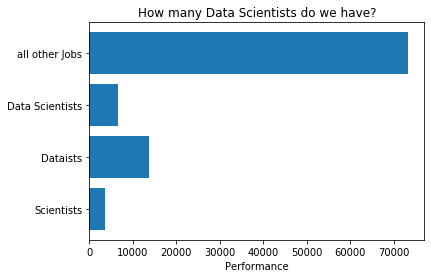

In [329]:
fig, ax = plt.subplots()
x=[400,4000]
data=[df.Job_oJ.count(), df.Job_DS.count(), df.Job_DJ.count(), df.Job_RS.count()]
y_pos = np.arange(len(data))
labels = ["all other Jobs","Data Scientists", "Dataists", "Scientists"]
#error = np.random.rand(len(people))

ax.barh(y_pos, data, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How many Data Scientists do we have?')

plt.show()

     Target Groups  employed  freelancing
0           Others     70386         3019
1  Data Scientists      6153          307
2         Dataists     13103          705
3       Scientists      3415          202


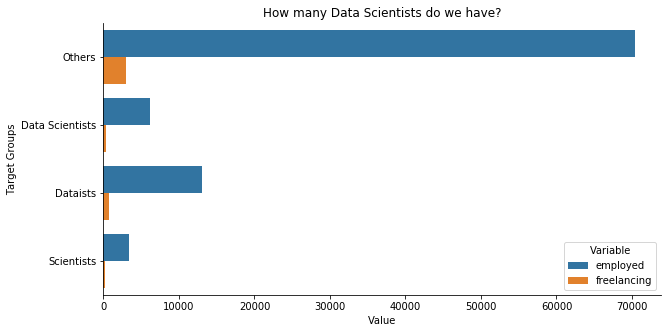

In [401]:
# Barplot of Taget Groups

df[df["Freelancer"]=="yes"].Job_oJ.count()#, df.Job_DS.count()
dy = pd.DataFrame({
    'Target Groups': ['Others', 'Data Scientists', 'Dataists', 'Scientists'],
    'employed': [df[df["Freelancer"]=="no"].Job_oJ.count(), df[df["Freelancer"]=="no"].Job_DS.count(),
                df[df["Freelancer"]=="no"].Job_DJ.count(), df[df["Freelancer"]=="no"].Job_RS.count()],
    'freelancing': [df[df["Freelancer"]=="yes"].Job_oJ.count(), df[df["Freelancer"]=="yes"].Job_DS.count(),
                   df[df["Freelancer"]=="yes"].Job_DJ.count(), df[df["Freelancer"]=="yes"].Job_RS.count()]
})
print(dy)
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = dy.melt(id_vars='Target Groups').rename(columns=str.title)
sns.barplot(y='Target Groups', x='Value', hue='Variable', data=tidy, ax=ax1).set(title = 'How many Data Scientists do we have?')
sns.despine(fig)

---

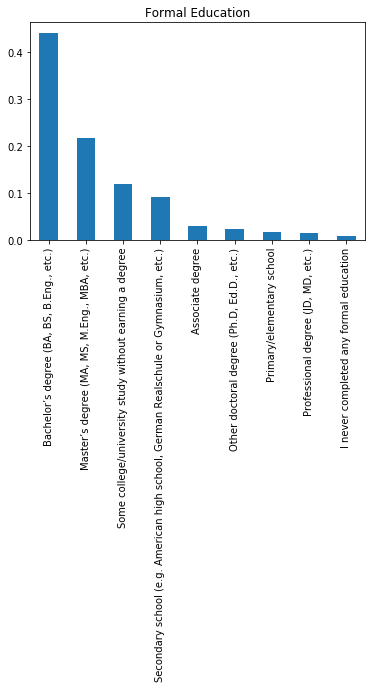

In [273]:
ed_vals = df.FormalEducation.value_counts()#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

# Data Cleaning
These Variables will be part of the modelling process and need to be cleaned:
salary, satisfaction, 

In [24]:
# Im only interested in full working people -> no parttime, students, etc.

h.get_cat("Employment",df)

['Not employed, and not looking for work',
 'Not employed, but looking for work',
 'Employed full-time',
 'Independent contractor, freelancer, or self-employed',
 nan,
 'Employed part-time',
 'Retired']

In [40]:
df = df[(df["Employment"]=='Employed full-time') | 
        (df["Employment"]=='Independent contractor, freelancer, or self-employed') |
        (df["Employment"]=='Employed part-time')]
h.df_info(df)

Rows: 77420 	 Variables: 85 	 	 Size: n/a kb


In [ ]:
c=h.outlier(df)

## Outlier Detection

In [ ]:
# TODO
- Students, Retires, raus
- Outliers raus
- Missing Values
- 

<h1 id="data_modelling">Data Modelling</h1>

<h2 id="job_satisfaction">Job Satisfaction</h2>

> 🤔 _How happy are Freelancer, and Data Scientists with their job?_

<h2 id="Popularity of Data Science over the Time">Development</h2>

> 🤔 _How is the Data Science Freelancer market developing over the time?_

In [146]:
df_2014.drop(0, axis=0)
df_2014.columns

df_2015 = h.read_csv_zip(2015)

Index(['What Country do you live in?', 'Unnamed: 1',
       'Which US State or Territory do you live in?', 'How old are you?',
       'What is your gender?',
       'How many years of IT/Programming experience do you have?',
       'Which of the following best describes your occupation?',
       'Including bonus, what is your annual compensation in USD?',
       'How would you best describe the industry you currently work in?',
       'How many developers are employed at your company?',
       ...
       'Did you participate in the Apptivate contest?',
       'What advertisers do you remember seeing on Stack Overflow?',
       'What is your current Stack Overflow reputation?',
       'How do you use Stack Overflow?', 'Unnamed: 114', 'Unnamed: 115',
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118',
       'How often do you find solutions to your programming problems on Stack Overflow without asking a new question?'],
      dtype='object', length=120)

In [136]:
df_2015.columns = df_2015.iloc[0]
df_2015.drop(0, axis=0)

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
2,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
3,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN
4,Latvia,25-29,Male,It depends,6 - 10 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
5,Norway,30-34,Male,Tabs,2 - 5 years,Back-end web developer,Windows 8,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26082,Vietnam,20-24,Male,Tabs,1 - 2 years,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26083,Vietnam,25-29,Male,Tabs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26084,Vietnam,25-29,Male,It depends,2 - 5 years,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26085,Zimbabwe,NaN,NaN,Huh?,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df_2015["Employment Status"].value_counts()

Employed full-time        14126
I'm a student              3379
Freelance / Contractor     1911
Employed part-time          901
Unemployed                  432
Prefer not to disclose      259
Other                       242
Retired                      54
Employment Status             1
Name: Employment Status, dtype: int64

In [127]:
df_2015["Occupation"].value_counts()

Full-stack web developer                                 6765
Student                                                  2845
Back-end web developer                                   2104
Desktop developer                                        1735
Front-end web developer                                  1242
Mobile developer - Android                                847
Mobile developer - iOS                                    634
Embedded application developer                            609
Enterprise level services developer                       599
Developer with a statistics or mathematics background     464
Data scientist                                            409
Executive (VP of Eng., CTO, CIO, etc.)                    376
Mobile developer                                          376
System administrator                                      344
DevOps                                                    322
Business intelligence or data warehousing expert          179
Graphics

In [123]:
df_2015.drop(0,axis=0)

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
2,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
3,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN
4,Latvia,25-29,Male,It depends,6 - 10 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
5,Norway,30-34,Male,Tabs,2 - 5 years,Back-end web developer,Windows 8,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26082,Vietnam,20-24,Male,Tabs,1 - 2 years,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26083,Vietnam,25-29,Male,Tabs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26084,Vietnam,25-29,Male,It depends,2 - 5 years,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26085,Zimbabwe,NaN,NaN,Huh?,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
# Question in Survey 2019
h.get_desc("JobSat")

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [305]:
# build jobsatisfaction index (1-5)

index = {'Slightly satisfied': 4, 
         'Slightly dissatisfied': 2,
         'Neither satisfied nor dissatisfied': 3,
         'Very satisfied': 5,
         'Very dissatisfied': 1,
         np.nan: np.nan
        }

df["JobSatIndex"] = df["JobSat"].apply(lambda x: index[x])

print("Avg Job Satisfaction: ", df.JobSatIndex.mean().round(2))  

Avg Job Satisfaction:  3.71


#### Job Satisfaction Difference between Freelancer and Employed

In [306]:
df.groupby('Employment') \
       .agg(n=('Employment', 'size'), Job_Satisfaction=('JobSatIndex', 'mean')).reset_index()

,Employment,n,Job_Satisfaction
0,"Independent contractor, freelancer, or self-em...",8511,3.713764


> ❗__Interesting__: no difference between Freelancer and employed

#### Job Satisfaction Difference between Data Science Jobs

In [307]:
df.groupby('TargetGroup') \
       .agg(n=('TargetGroup', 'size'), Job_Satisfaction=('JobSatIndex', 'mean')).reset_index()

,TargetGroup,n,Job_Satisfaction
0,Data Scientist,735,3.701724
1,Something with Data,832,3.755245
2,Something with Science,284,3.740909
3,other Job,6660,3.708388


> ❗only slight differences, but the direction looks interesting: Scientists are happier

<h2 id="income">Income</h2>

There are 3 questions to income:

In [308]:
h.get_desc("CompTotal")

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [309]:
h.get_desc("CompFreq")

'Is that compensation weekly, monthly, or yearly?'

In [310]:
h.get_desc("ConvertedComp")

'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.'

In [311]:
USA = df[df["Country"]=="United States"]
world = df.copy()
# Build var Salary

# 2. delete all cases with no income
USA.dropna(subset=['ConvertedComp'], inplace=True)
world.dropna(subset=['ConvertedComp'], inplace=True)

# For USA
print("Avg Salary per year (USA) \n=============================================== \n",
USA.groupby('TargetGroup') \
       .agg(n=('TargetGroup', 'size'), Salary=('ConvertedComp', 'mean')).reset_index()
)
print("\n")
# For World
print("Avg Salary per year (WORLD) \n=============================================== \n",
world.groupby('TargetGroup') \
       .agg(n=('TargetGroup', 'size'), Salary=('ConvertedComp', 'mean')).reset_index()
     )

Avg Salary per year (USA) 
               TargetGroup    n         Salary
0          Data Scientist   75  268333.493333
1     Something with Data   89  210429.303371
2  Something with Science   21  299702.380952
3               other Job  518  208688.084942


Avg Salary per year (WORLD) 
               TargetGroup     n         Salary
0          Data Scientist   364  129263.590659
1     Something with Data   455  111990.857143
2  Something with Science   127  100847.992126
3               other Job  3597  101575.716986


> ❗Data Scientists make more cash than Scientists or Data Worker

<h2 id="working_hours">Working Hours</h2>

In [312]:
h.get_desc("WorkWeekHrs")

'On average, how many hours per week do you work?'

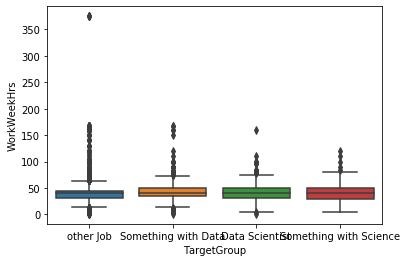

In [313]:
sns.boxplot(y="WorkWeekHrs", x="TargetGroup", data=df)

>❗Outliers! Lets say, everything more than 80h/week is unrealistic

In [314]:
# set maximum working hour per week
OUTLIER_SIZE=100

In [315]:
#TODO -> NaN in Working Hours <- Sandbox
print("Avg Working Hours per week (Freelancer)\n=========================================== \n",
df[(df.WorkWeekHrs<=OUTLIER_SIZE) & 
   (df.Employment=="Independent contractor, freelancer, or self-employed")].
      groupby('TargetGroup')
      .agg(n=('TargetGroup', 'size'), hours=('WorkWeekHrs', 'mean')).reset_index()
)

Avg Working Hours per week (Freelancer)
               TargetGroup     n      hours
0          Data Scientist   472  40.937500
1     Something with Data   583  41.262864
2  Something with Science   172  38.793605
3               other Job  4371  39.099801


In [316]:
print("Avg Working Hours per week (Employed full-time)\n=========================================== \n",
df[(df.WorkWeekHrs<=OUTLIER_SIZE) & 
   (df.Employment=="Employed full-time")].
      groupby('TargetGroup')
      .agg(n=('TargetGroup', 'size'), hours=('WorkWeekHrs', 'mean')).reset_index()
)

Avg Working Hours per week (Employed full-time)
 Empty DataFrame
Columns: [TargetGroup, n, hours]
Index: []


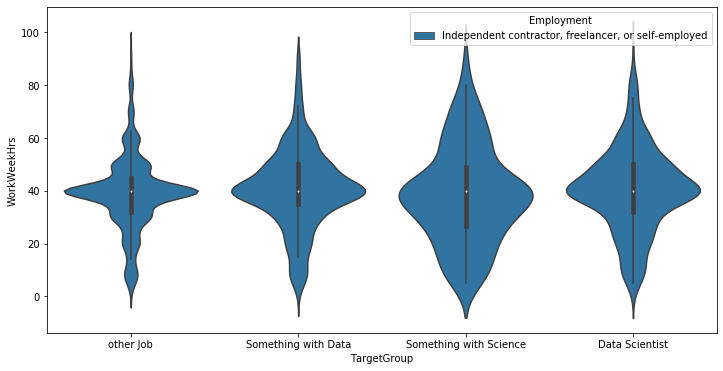

In [317]:
plt.figure(figsize=(12,6))
sns.violinplot(y="WorkWeekHrs", x="TargetGroup", hue="Employment", data=df[df.WorkWeekHrs<OUTLIER_SIZE])

🤓 The Median is all the same, because the data range is between 0 and 100 hours.

<h2 id="working_style">Working Style</h2>

### Work Structure

In [318]:
# Question in Questionaire
h.get_desc("WorkPlan")

'How structured or planned is your work?'

In [319]:
# Answer Categories in Questionaire
h.get_cat("WorkPlan")

[nan,
 "There's no schedule or spec; I work on what seems most important or urgent",
 'There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
 'There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns']

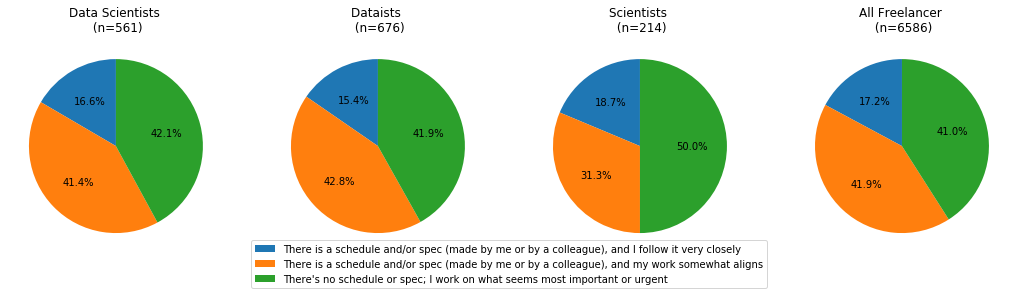

In [320]:
# Piecharts abour Work Structure (Freelancer)

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

#labels = ['I follow a schedule closely', 'My work somewhat aligns to schedule', 'I work on what seems most important/urgent']
labels = list(df.groupby("WorkPlan").count()["Respondent"].index)

# Piechart for Datascience Freelancer
datascientists = df[df["TargetGroup"]=="Data Scientist"].groupby("WorkPlan").count()["Respondent"]
axes[0].pie(datascientists, startangle=90, autopct='%1.1f%%')
axes[0].set_title("Data Scientists \n (n={})".format(datascientists.sum()))

# Piechart for Data Freelancer
dataists = df[df["TargetGroup"]=="Something with Data"].groupby("WorkPlan").count()["Respondent"]
axes[1].pie(dataists, startangle=90, autopct='%1.1f%%' )
axes[1].set_title("Dataists \n (n={})".format(dataists.sum()))

# Piechart for Science Freelancer
scientists = df[df["TargetGroup"]=="Something with Science"].groupby("WorkPlan").count()["Respondent"]
axes[2].pie(scientists, startangle=90, autopct='%1.1f%%' )
axes[2].set_title("Scientists \n (n={})".format(scientists.sum()))

# Piechart for All Freelancer
others = df.groupby("WorkPlan").count()["Respondent"]
axes[3].pie(others, startangle=90, autopct='%1.1f%%')
axes[3].set_title("All Freelancer \n (n={})".format(others.sum()))

fig.legend(labels=labels, loc='lower center')

Not so many differences between Freelancer 🤔. At least we can say that Scientists are _more free_ with their work schedule.
As a comparison, here are the results for Employers:

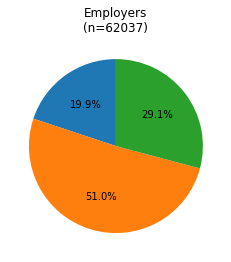

In [324]:
# Piechart abour Work Structure (Employers)

employers = df_employed.groupby("WorkPlan").count()["Respondent"] 
plt.pie(employers, startangle=90, autopct='%1.1f%%')
plt.title("Employers\n(n={})".format(employers.sum()))
plt.show()

Okay, that makes sense. Employees must follow more often a stricter work schedule than Freelancer.

<h2 id="coding_languages">Coding Languages</h2>

In [138]:
# Todo: heatmap target group vs. coding languages

# Pivot Table (rows=target group, col=coding languages, values=how many code in this language)

In [139]:
schema.loc[43:51]

,Column,QuestionText
43,LanguageWorkedWith,"Which of the following programming, scripting,..."
44,LanguageDesireNextYear,"Which of the following programming, scripting,..."
45,DatabaseWorkedWith,Which of the following database environments h...
46,DatabaseDesireNextYear,Which of the following database environments h...
47,PlatformWorkedWith,Which of the following platforms have you done...
48,PlatformDesireNextYear,Which of the following platforms have you done...
49,WebFrameWorkedWith,Which of the following web frameworks have you...
50,WebFrameDesireNextYear,Which of the following web frameworks have you...
51,MiscTechWorkedWith,"Which of the following other frameworks, libra..."


In [140]:
h.get_desc("PlatformWorkedWith")

'Which of the following platforms have you done extensive development work for over the past year?   (If you both developed for the platform and want to continue to do so, please check both boxes in that row.)'

In [141]:
list(df.WorkPlan.unique())

["There's no schedule or spec; I work on what seems most important or urgent",
 'There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
 'There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns',
 nan]

### Years Coding Professionally
Todo: bar graph (like in survey summary)

In [143]:
# Todo: create variables for every language as dummy
# balkendiagram (geordnet): Python: 80%, R: 75%, etc.
# h.get_cat("PlatformWorkedWith")
#list(df.PlatformWorkedWith.unique())

In [403]:
# Save cleaned Dataframe
df.to_pickle("data/df_cleaned.pkl")